Install Required Libraries

In [97]:
!pip install kagglehub
!pip install xgboost
!pip install imbalanced-learn
!pip install streamlit

Import Libraries

In [98]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

Load Dataset from KaggleHub

In [99]:
# Download latest version
path = kagglehub.dataset_download("miadul/customer-churn-prediction-business-dataset")

print("Path to dataset files:", path)

# Load CSV file
files = os.listdir(path)
print("Files:", files)

# Assuming main CSV file
data = pd.read_csv(os.path.join(path, files[0]))

data.head()

Using Colab cache for faster access to the 'customer-churn-prediction-business-dataset' dataset.
Path to dataset files: /kaggle/input/customer-churn-prediction-business-dataset
Files: ['customer_churn_business_dataset.csv']


,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


Data Cleaning

In [100]:
# Display all columns to identify the correct 'TotalCharges' equivalent
print("Available columns:", data.columns.tolist())

# Convert to numeric
# Replace 'TotalCharges' below with the correct column name from the list above
# For example, if the correct column is 'TotalRevenue', use data['TotalRevenue'] instead.
data['total_revenue'] = pd.to_numeric(data['total_revenue'], errors='coerce')

# Check missing values
print(data.isnull().sum())

# Fill missing values with median (update with the correct column name)
data['total_revenue'].fillna(data['total_revenue'].median(), inplace=True)

Available columns: ['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment', 'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins', 'weekly_active_days', 'avg_session_time', 'features_used', 'usage_growth_rate', 'last_login_days_ago', 'monthly_fee', 'total_revenue', 'payment_method', 'payment_failures', 'discount_applied', 'price_increase_last_3m', 'support_tickets', 'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations', 'email_open_rate', 'marketing_click_rate', 'nps_score', 'survey_response', 'referral_count', 'churn']
customer_id                  0
gender                       0
age                          0
country                      0
city                         0
customer_segment             0
tenure_months                0
signup_channel               0
contract_type                0
monthly_logins               0
weekly_active_days           0
avg_session_time             0
features_used                0
usage_growth_rate         

Exploratory Data Analysis (EDA)

Churn Distribution

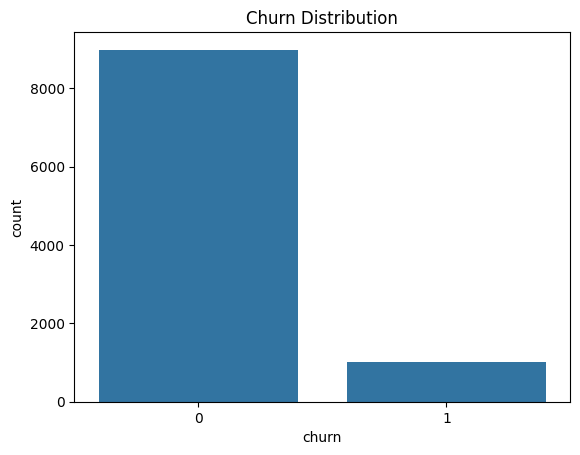

In [101]:
sns.countplot(x='churn', data=data)
plt.title("Churn Distribution")
plt.show()

Churn by Contract Type

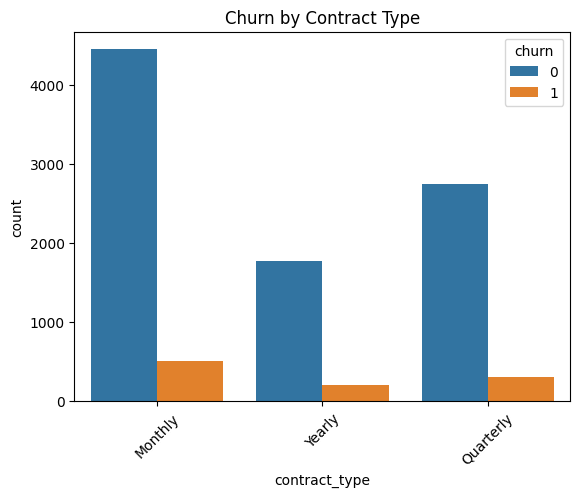

In [102]:
sns.countplot(x='contract_type', hue='churn', data=data)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

X_train shape: (8000, 10045)
y_train shape: (8000,)
X_test shape: (2000, 10045)
y_test shape: (2000,)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.00      0.00      0.00       204

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000

Confusion Matrix:
 [[1796    0]
 [ 204    0]]
ROC AUC Score: 0.7976317197257522


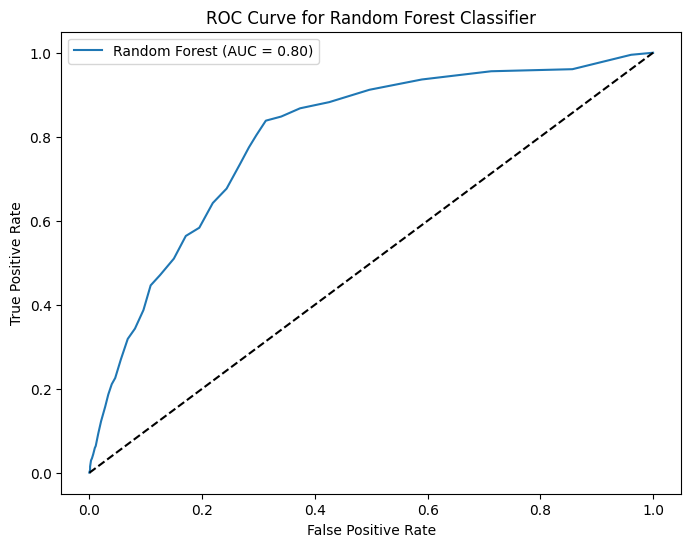

In [103]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

X_train shape: (8000, 10045)
y_train shape: (8000,)
X_test shape: (2000, 10045)
y_test shape: (2000,)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.00      0.00      0.00       204

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000

Confusion Matrix:
 [[1796    0]
 [ 204    0]]
ROC AUC Score: 0.7976317197257522


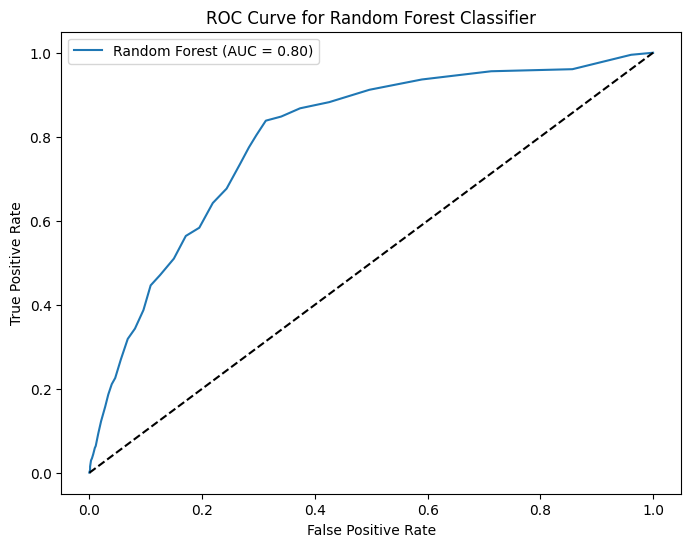

In [104]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

X_train shape: (8000, 10045)
y_train shape: (8000,)
X_test shape: (2000, 10045)
y_test shape: (2000,)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.00      0.00      0.00       204

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000

Confusion Matrix:
 [[1796    0]
 [ 204    0]]
ROC AUC Score: 0.7976317197257522


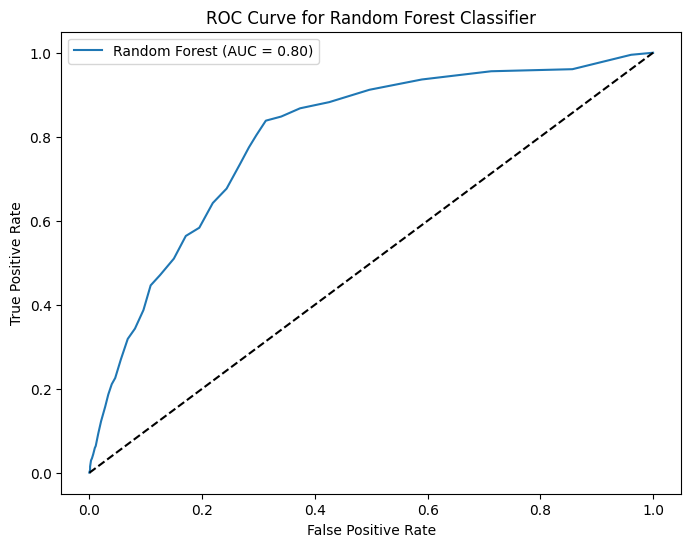

In [105]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

X_train shape: (8000, 10045)
y_train shape: (8000,)
X_test shape: (2000, 10045)
y_test shape: (2000,)

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.00      0.00      0.00       204

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000

Confusion Matrix:
 [[1796    0]
 [ 204    0]]
ROC AUC Score: 0.7976317197257522


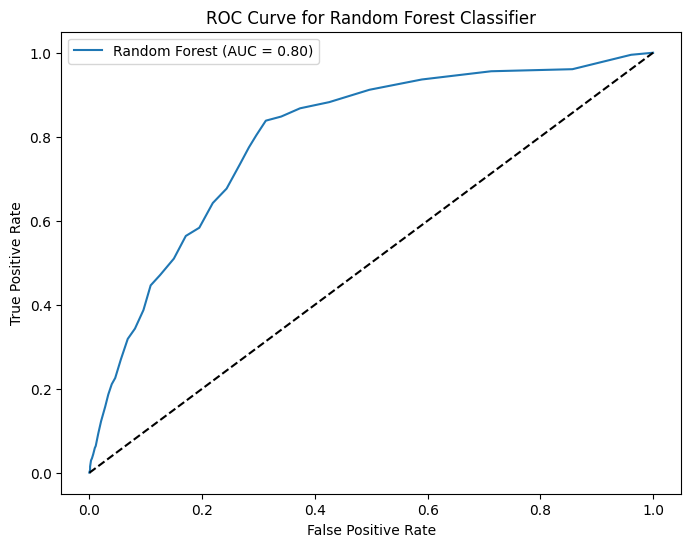

In [106]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

Churn by Internet Service

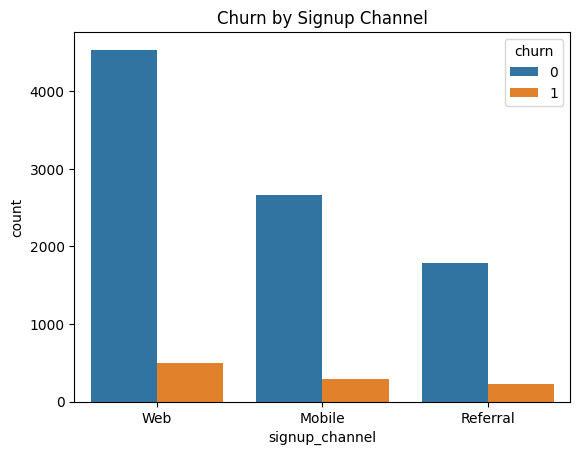

In [107]:
sns.countplot(x='signup_channel', hue='churn', data=data)
plt.title("Churn by Signup Channel")
plt.show()


XGBoost Classifier Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1796
           1       0.23      0.08      0.12       204

    accuracy                           0.88      2000
   macro avg       0.56      0.53      0.53      2000
weighted avg       0.83      0.88      0.85      2000

Confusion Matrix (with SMOTE):
 [[1738   58]
 [ 187   17]]
ROC AUC Score (with SMOTE): 0.7526147430018779


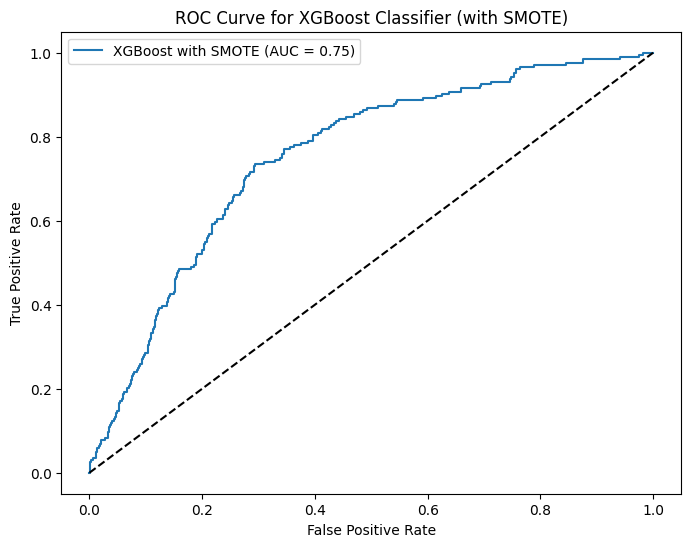

In [108]:
# Train an XGBoost Classifier model on the resampled data
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_xgb_smote = xgb_model_smote.predict(X_test)
y_proba_xgb_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nXGBoost Classifier Performance (with SMOTE):")
print(classification_report(y_test, y_pred_xgb_smote))
print("Confusion Matrix (with SMOTE):\n", confusion_matrix(y_test, y_pred_xgb_smote))
print("ROC AUC Score (with SMOTE):", roc_auc_score(y_test, y_proba_xgb_smote))

# Plot ROC Curve
fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_test, y_proba_xgb_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_smote, tpr_xgb_smote, label=f'XGBoost with SMOTE (AUC = {roc_auc_score(y_test, y_proba_xgb_smote):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier (with SMOTE)')
plt.legend()
plt.show()


XGBoost Classifier Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1796
           1       0.23      0.08      0.12       204

    accuracy                           0.88      2000
   macro avg       0.56      0.53      0.53      2000
weighted avg       0.83      0.88      0.85      2000

Confusion Matrix (with SMOTE):
 [[1738   58]
 [ 187   17]]
ROC AUC Score (with SMOTE): 0.7526147430018779


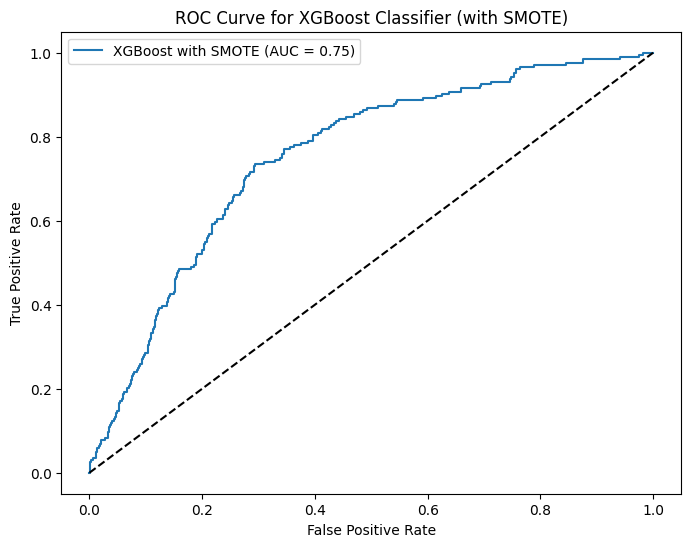

In [109]:
# Train an XGBoost Classifier model on the resampled data
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_xgb_smote = xgb_model_smote.predict(X_test)
y_proba_xgb_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nXGBoost Classifier Performance (with SMOTE):")
print(classification_report(y_test, y_pred_xgb_smote))
print("Confusion Matrix (with SMOTE):\n", confusion_matrix(y_test, y_pred_xgb_smote))
print("ROC AUC Score (with SMOTE):", roc_auc_score(y_test, y_proba_xgb_smote))

# Plot ROC Curve
fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_test, y_proba_xgb_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_smote, tpr_xgb_smote, label=f'XGBoost with SMOTE (AUC = {roc_auc_score(y_test, y_proba_xgb_smote):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier (with SMOTE)')
plt.legend()
plt.show()

Shape of X_train_resampled: (14366, 10045)
Shape of y_train_resampled: (14366,)
Class distribution after SMOTE: churn
0    7183
1    7183
Name: count, dtype: int64

Random Forest Classifier Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.38      0.01      0.03       204

    accuracy                           0.90      2000
   macro avg       0.64      0.51      0.49      2000
weighted avg       0.85      0.90      0.85      2000

Confusion Matrix (with SMOTE):
 [[1791    5]
 [ 201    3]]
ROC AUC Score (with SMOTE): 0.7172147255338661


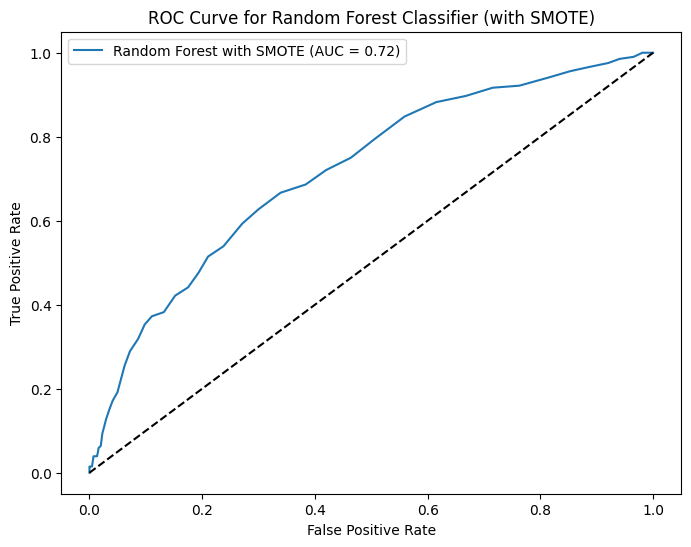

In [110]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Shape of X_train_resampled:', X_train_resampled.shape)
print('Shape of y_train_resampled:', y_train_resampled.shape)
print('Class distribution after SMOTE:', pd.Series(y_train_resampled).value_counts())

# Train a RandomForestClassifier model on the resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_rf_smote = rf_model_smote.predict(X_test)
y_proba_rf_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance (with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix (with SMOTE):\n", confusion_matrix(y_test, y_pred_rf_smote))
print("ROC AUC Score (with SMOTE):", roc_auc_score(y_test, y_proba_rf_smote))

# Plot ROC Curve
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest with SMOTE (AUC = {roc_auc_score(y_test, y_proba_rf_smote):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (with SMOTE)')
plt.legend()
plt.show()

Shape of X_train_resampled: (14366, 10045)
Shape of y_train_resampled: (14366,)
Class distribution after SMOTE: churn
0    7183
1    7183
Name: count, dtype: int64

Random Forest Classifier Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.38      0.01      0.03       204

    accuracy                           0.90      2000
   macro avg       0.64      0.51      0.49      2000
weighted avg       0.85      0.90      0.85      2000

Confusion Matrix (with SMOTE):
 [[1791    5]
 [ 201    3]]
ROC AUC Score (with SMOTE): 0.7172147255338661


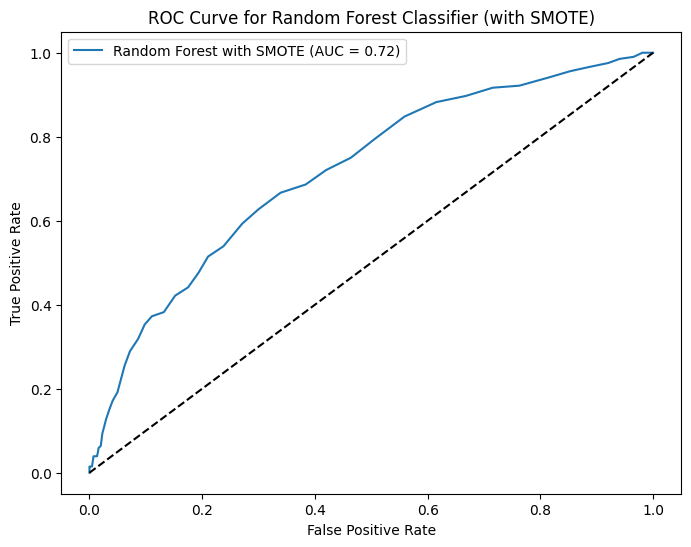

In [111]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Shape of X_train_resampled:', X_train_resampled.shape)
print('Shape of y_train_resampled:', y_train_resampled.shape)
print('Class distribution after SMOTE:', pd.Series(y_train_resampled).value_counts())

# Train a RandomForestClassifier model on the resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_rf_smote = rf_model_smote.predict(X_test)
y_proba_rf_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance (with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix (with SMOTE):\n", confusion_matrix(y_test, y_pred_rf_smote))
print("ROC AUC Score (with SMOTE):", roc_auc_score(y_test, y_proba_rf_smote))

# Plot ROC Curve
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest with SMOTE (AUC = {roc_auc_score(y_test, y_proba_rf_smote):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (with SMOTE)')
plt.legend()
plt.show()

Shape of X_train_resampled: (14366, 10045)
Shape of y_train_resampled: (14366,)
Class distribution after SMOTE: churn
0    7183
1    7183
Name: count, dtype: int64

Random Forest Classifier Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.38      0.01      0.03       204

    accuracy                           0.90      2000
   macro avg       0.64      0.51      0.49      2000
weighted avg       0.85      0.90      0.85      2000

Confusion Matrix (with SMOTE):
 [[1791    5]
 [ 201    3]]
ROC AUC Score (with SMOTE): 0.7172147255338661


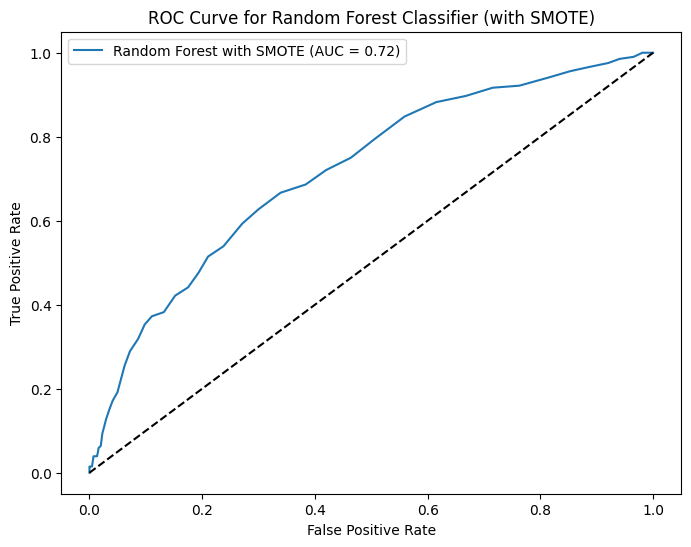

In [112]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Shape of X_train_resampled:', X_train_resampled.shape)
print('Shape of y_train_resampled:', y_train_resampled.shape)
print('Class distribution after SMOTE:', pd.Series(y_train_resampled).value_counts())

# Train a RandomForestClassifier model on the resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred_rf_smote = rf_model_smote.predict(X_test)
y_proba_rf_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nRandom Forest Classifier Performance (with SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix (with SMOTE):\n", confusion_matrix(y_test, y_pred_rf_smote))
print("ROC AUC Score (with SMOTE):", roc_auc_score(y_test, y_proba_rf_smote))

# Plot ROC Curve
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest with SMOTE (AUC = {roc_auc_score(y_test, y_proba_rf_smote):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (with SMOTE)')
plt.legend()
plt.show()

Tenure vs Churn

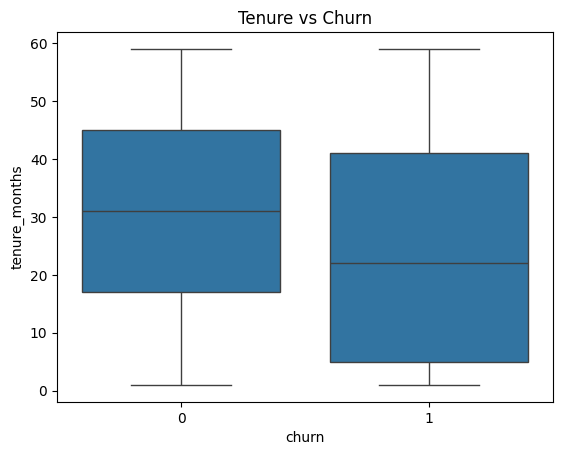

In [113]:
sns.boxplot(x='churn', y='tenure_months', data=data)
plt.title("Tenure vs Churn")
plt.show()

Feature Engineering

Create Monthly_Charge_Per_Service

Encode Target

One-Hot Encoding

In [114]:
data = pd.get_dummies(data, drop_first=True)

X = data.drop('churn', axis=1)
y = data['churn']

Train-Test Split (80/20)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Handle Class Imbalance using SMOTE

In [116]:
smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: churn
0    7183
1     817
Name: count, dtype: int64
After SMOTE: churn
0    7183
1    7183
Name: count, dtype: int64


Modeling

Random Forest

In [117]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:,1]


XGBoost

In [118]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)

xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:,1]


Evaluation

Classification Report

In [119]:
print("Random Forest Report")
print(classification_report(y_test, rf_preds))

print("XGBoost Report")
print(classification_report(y_test, xgb_preds))


Random Forest Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1796
           1       0.38      0.01      0.03       204

    accuracy                           0.90      2000
   macro avg       0.64      0.51      0.49      2000
weighted avg       0.85      0.90      0.85      2000

XGBoost Report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1796
           1       0.23      0.08      0.12       204

    accuracy                           0.88      2000
   macro avg       0.56      0.53      0.53      2000
weighted avg       0.83      0.88      0.85      2000



Confusion Matrix

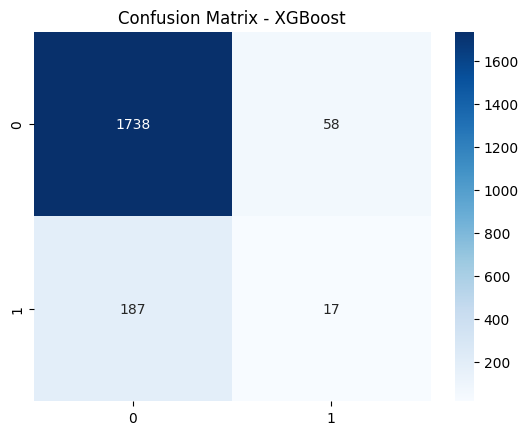

In [120]:
sns.heatmap(confusion_matrix(y_test, xgb_preds),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()


Feature Importance (Business Insight)

In [121]:
importances = pd.Series(xgb.feature_importances_, index=X.columns)
top5 = importances.sort_values(ascending=False).head(5)

print("Top 5 Features Influencing Churn:")
print(top5)


Top 5 Features Influencing Churn:
csat_score                     0.093424
customer_segment_Individual    0.047936
customer_id_CUST_06309         0.035611
signup_channel_Web             0.035462
payment_method_PayPal          0.032748
dtype: float32


Test Sample

In [122]:
# Create sample test customers

sample_data = pd.DataFrame({
    'tenure': [1, 24, 60, 5, 12],
    'MonthlyCharges': [85.70, 70.35, 95.00, 100.20, 50.00],
    'TotalCharges': [85.70, 1688.50, 5700.00, 500.00, 600.00]
})

# Match training columns
sample_data = sample_data.reindex(columns=X.columns, fill_value=0)

sample_predictions = xgb.predict(sample_data)
sample_probabilities = xgb.predict_proba(sample_data)[:,1]

results = sample_data.copy()
results['Predicted_Churn'] = sample_predictions
results['Churn_Probability'] = sample_probabilities

results


,age,tenure_months,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,...,payment_method_Card,payment_method_PayPal,discount_applied_Yes,price_increase_last_3m_Yes,complaint_type_Service,complaint_type_Technical,survey_response_Satisfied,survey_response_Unsatisfied,Predicted_Churn,Churn_Probability
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.072248
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.072248
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.072248
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.072248
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.072248
